In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import statsmodels.api as sm
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from tensorflow.keras.layers import LSTM, Dense
import seaborn as sns

In [3]:
df = pd.read_csv('FinalON.csv')

In [4]:
df

,Date,provincename,Construction,Transportation,Agriculture,Population,Station Name,Max Temp (Â°C),Total Snow (cm),Total Precip (mm),Min Temp (Â°C),Mean Temp (Â°C),Heat Deg Days (Â°C),Cool Deg Days (Â°C),Longitude (x),Latitude (y)
0,2013-01-01,Ontario,7.189140,3.318969,9.898426,2753,Atikon,-12.4,1.182468,0.3,-28.8,-20.6,38.6,0.0,-91.63,48.76
1,2013-02-01,Ontario,6.983955,3.279496,10.570972,2753,Atikon,-21.3,1.164286,0.5,-34.2,-27.8,45.8,0.0,-91.63,48.76
2,2013-03-01,Ontario,7.171888,3.387444,9.882637,2753,Atikon,-5.0,2.109740,0.0,-23.0,-14.0,32.0,0.0,-91.63,48.76
3,2013-04-01,Ontario,7.183823,3.423812,10.693657,2753,Atikon,-1.7,2.127922,0.0,-14.6,-8.2,26.2,0.0,-91.63,48.76
4,2013-05-01,Ontario,7.213297,3.347056,11.236657,2753,Atikon,6.2,1.963636,0.0,-1.5,2.4,15.6,0.0,-91.63,48.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,2021-08-01,Ontario,231.107370,74.182849,39.128395,52293,Welland,21.7,2.880000,24.1,13.1,17.4,0.6,0.0,-79.33,42.97
2144,2021-09-01,Ontario,234.146361,76.382107,40.226316,52293,Welland,22.9,3.011111,0.0,12.8,17.9,0.1,0.0,-79.33,42.97
2145,2021-10-01,Ontario,235.917787,76.307985,38.387345,52293,Welland,18.9,3.350000,0.0,8.9,13.9,4.1,0.0,-79.33,42.97
2146,2021-11-01,Ontario,244.388848,77.185293,42.037802,52293,Welland,10.3,3.828571,0.0,2.3,6.3,11.7,0.0,-79.33,42.97


In [5]:
df.set_index('Date', inplace=True)

In [6]:
df.index = pd.to_datetime(df.index)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2148 entries, 2013-01-01 to 2021-12-01
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   provincename         2148 non-null   object 
 1   Construction         2148 non-null   float64
 2   Transportation       2148 non-null   float64
 3   Agriculture          2148 non-null   float64
 4   Population           2148 non-null   int64  
 5   Station Name         2148 non-null   object 
 6   Max Temp (Â°C)       2148 non-null   float64
 7   Total Snow (cm)      2148 non-null   float64
 8   Total Precip (mm)    2148 non-null   float64
 9   Min Temp (Â°C)       2148 non-null   float64
 10  Mean Temp (Â°C)      2148 non-null   float64
 11  Heat Deg Days (Â°C)  2148 non-null   float64
 12  Cool Deg Days (Â°C)  2148 non-null   float64
 13  Longitude (x)        2148 non-null   float64
 14  Latitude (y)         2148 non-null   float64
dtypes: float64(12), int6

In [8]:
unique_station_names = df['Station Name'].unique()
productivity_columns = ['Construction',  'Transportation', 'Agriculture']


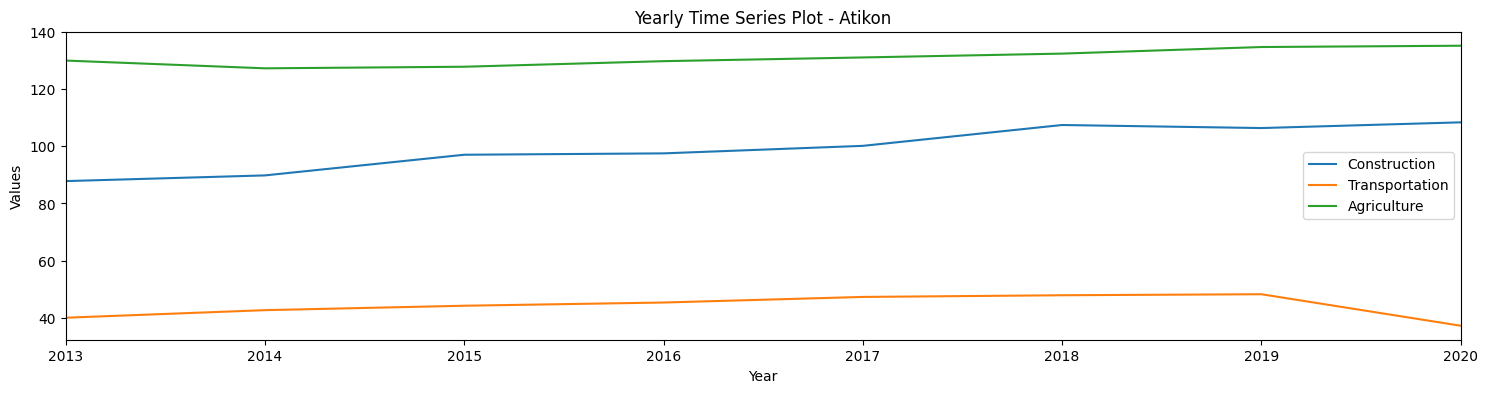

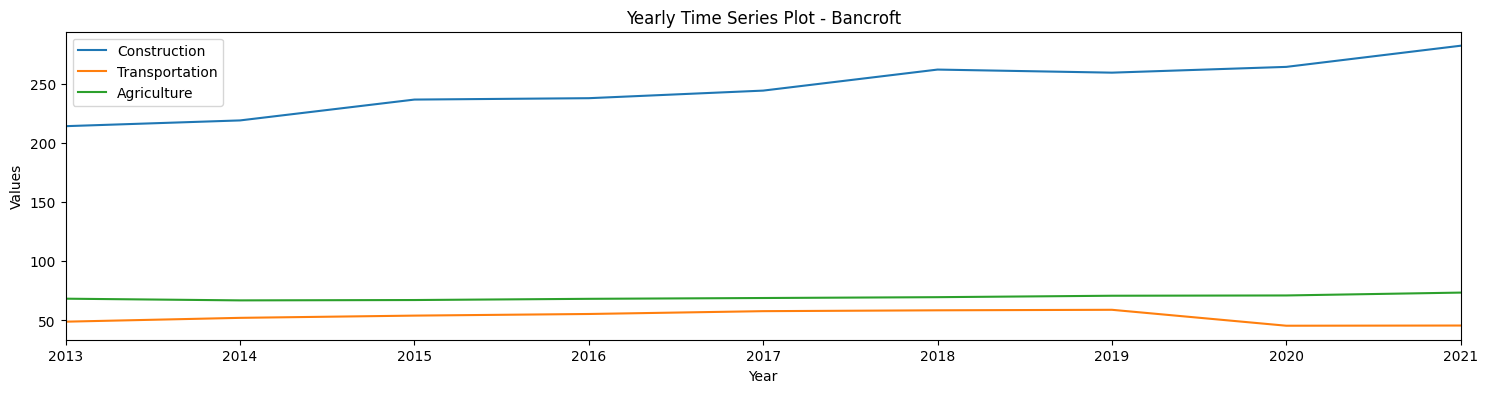

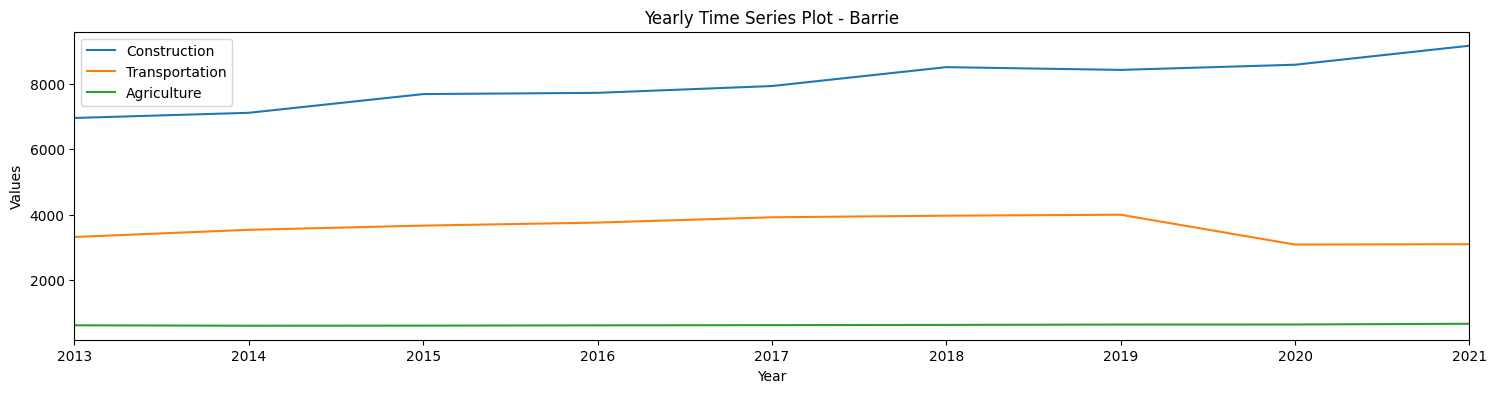

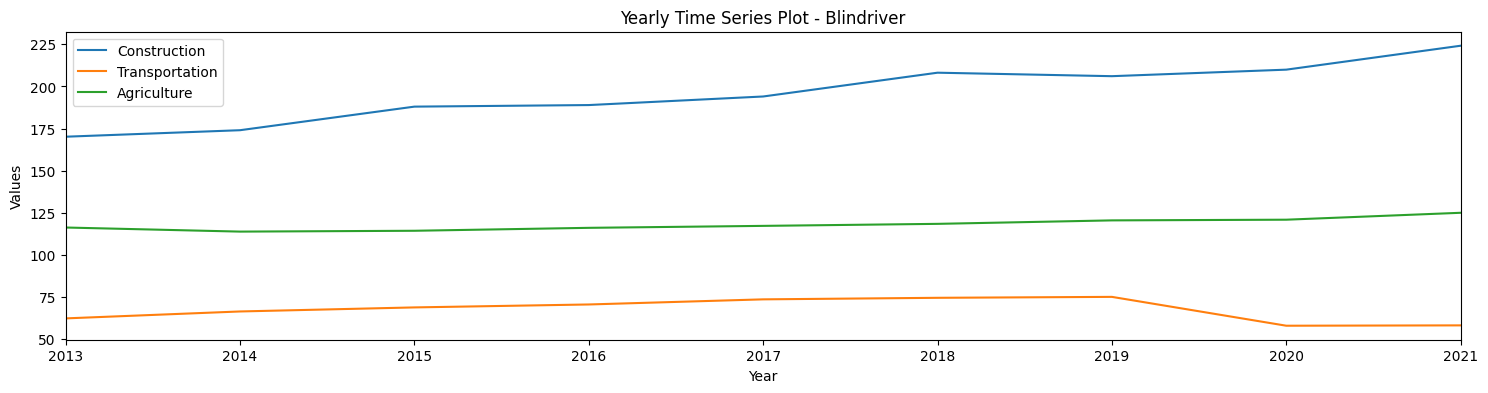

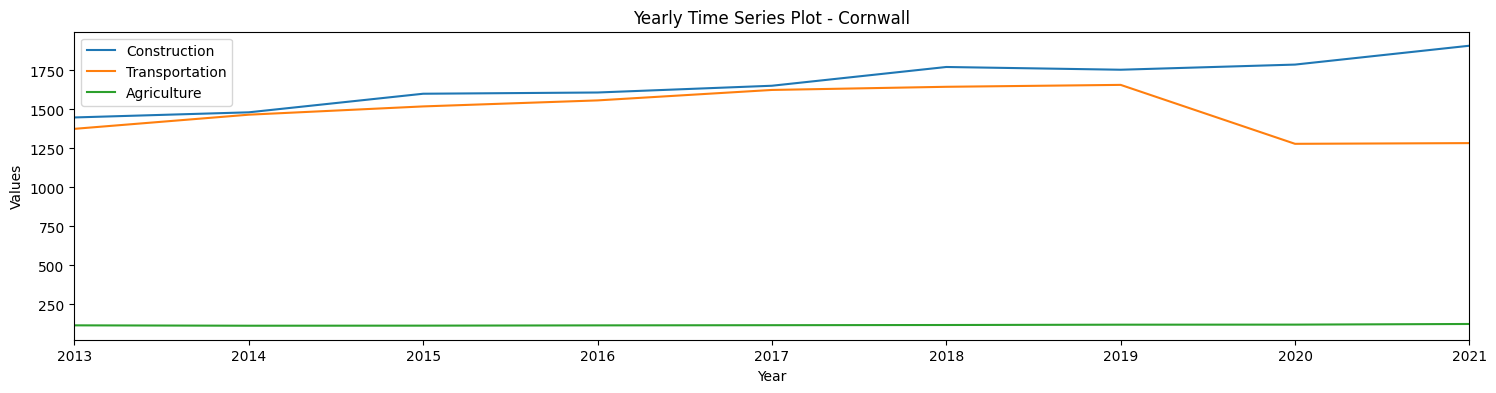

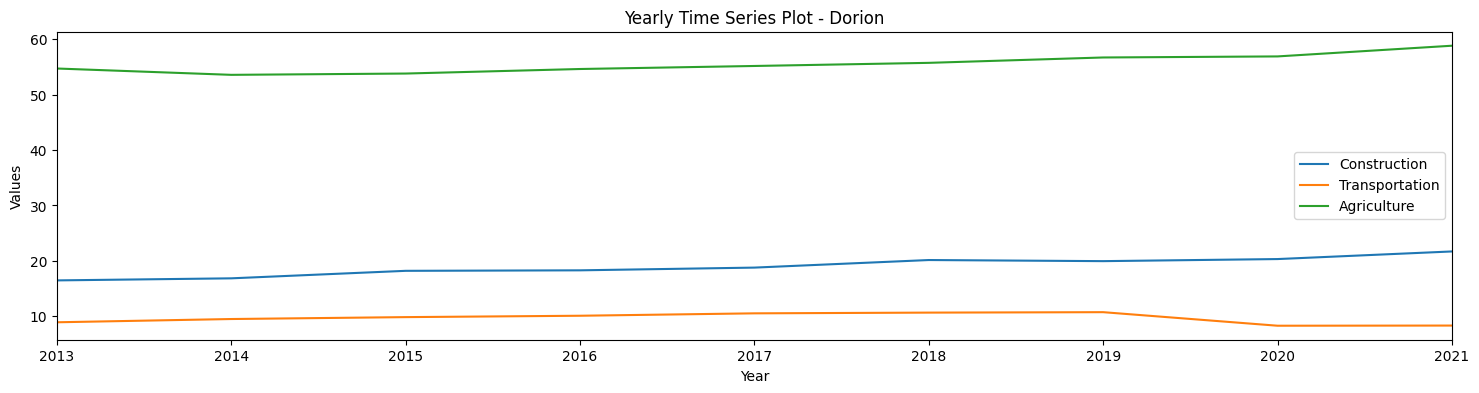

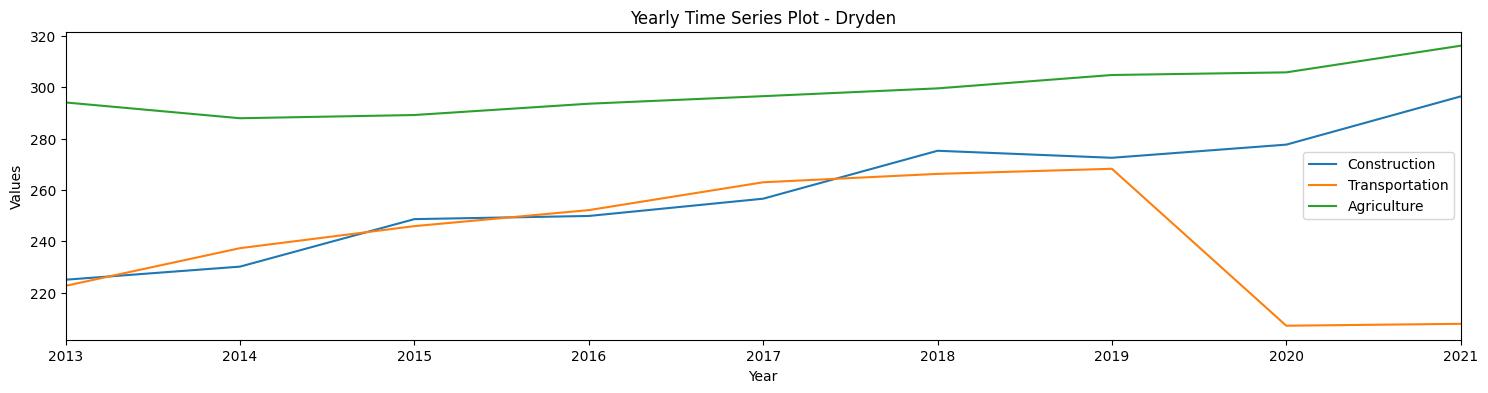

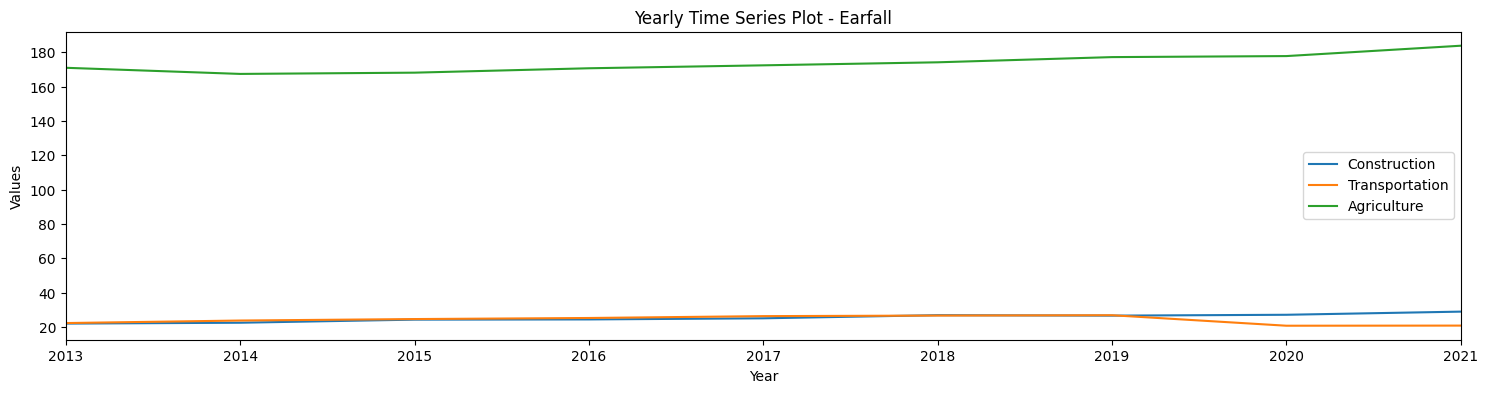

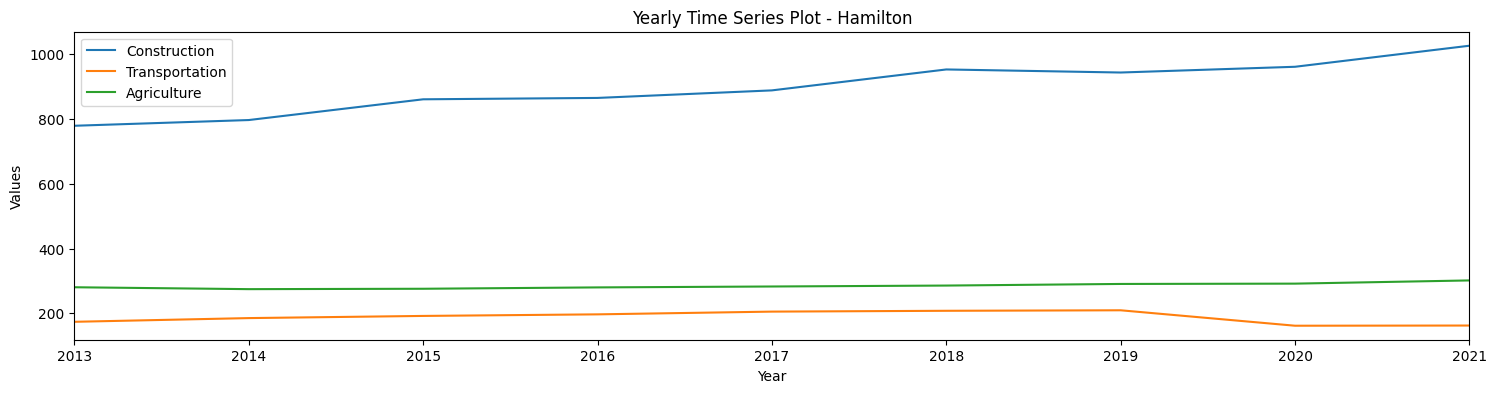

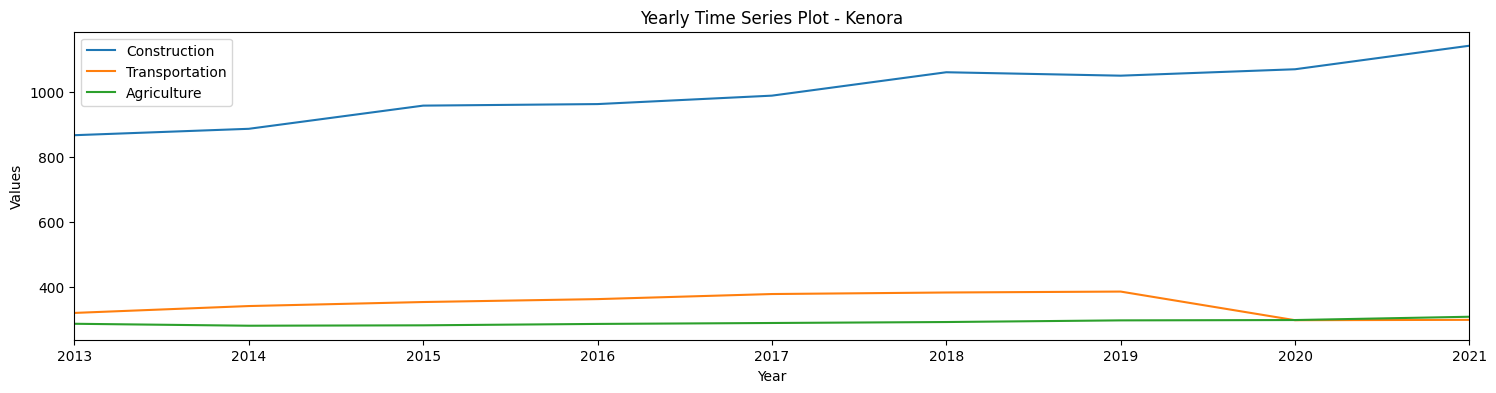

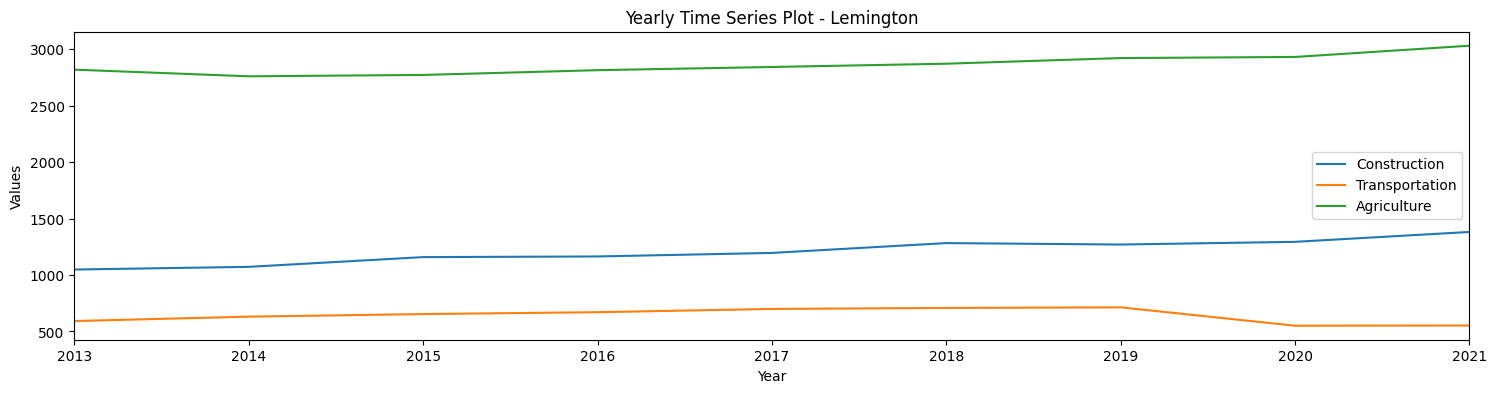

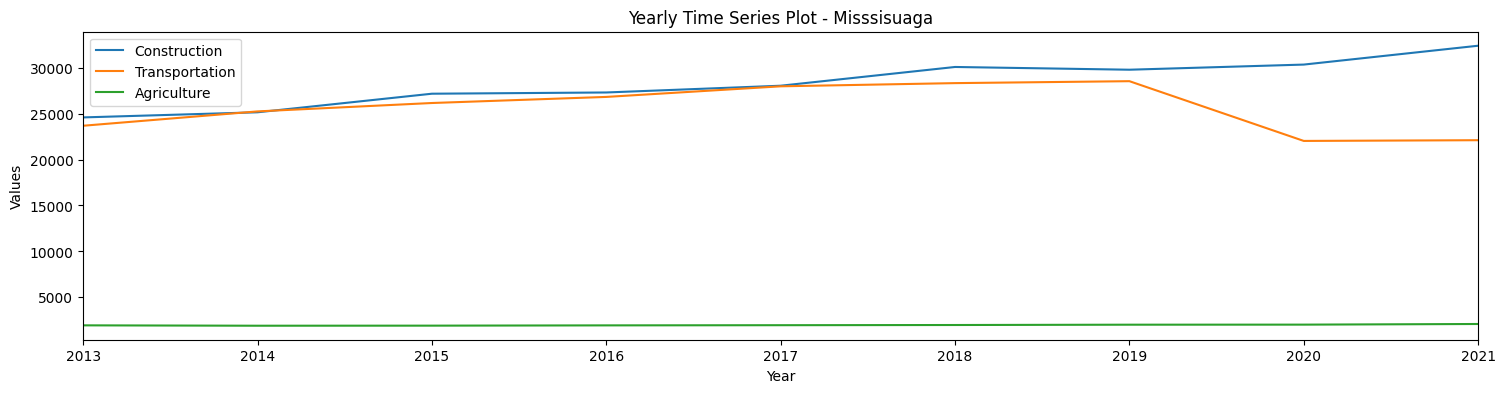

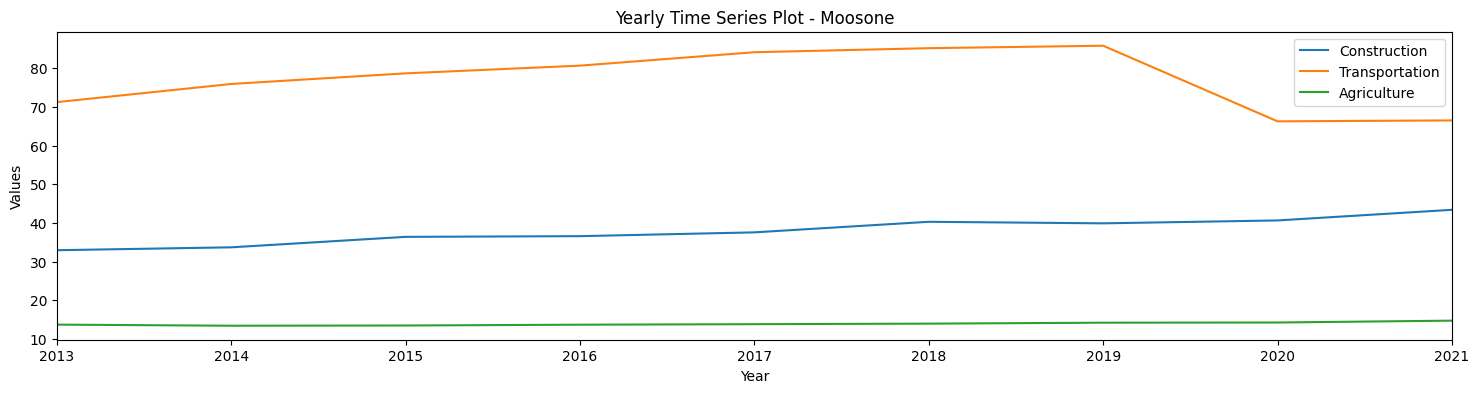

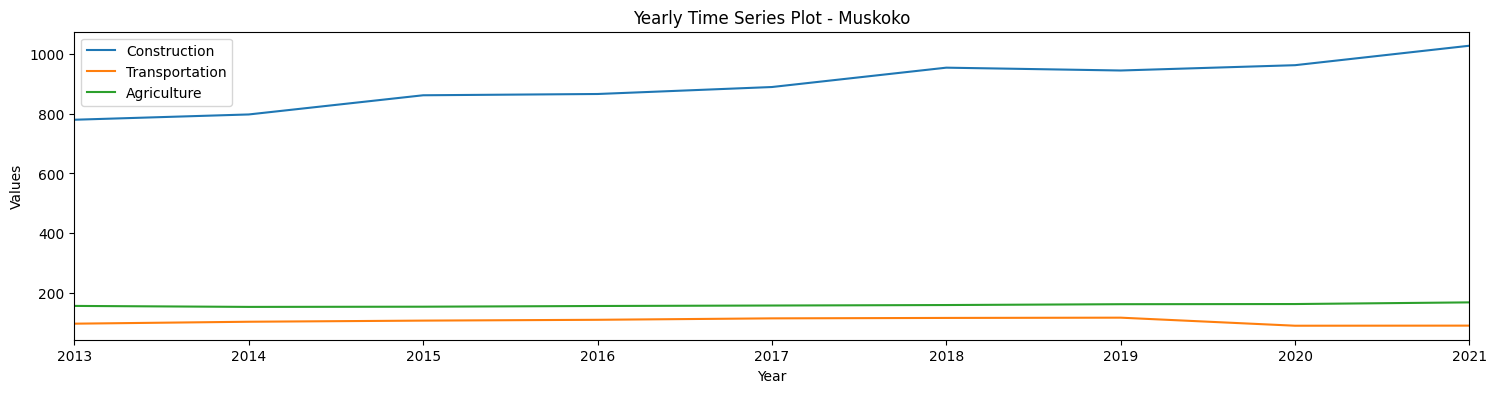

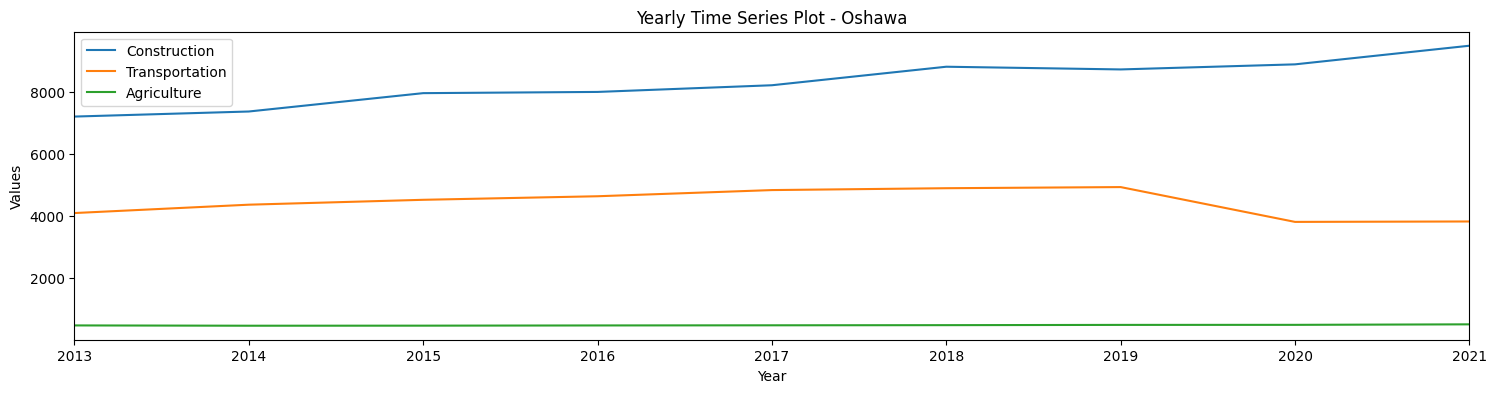

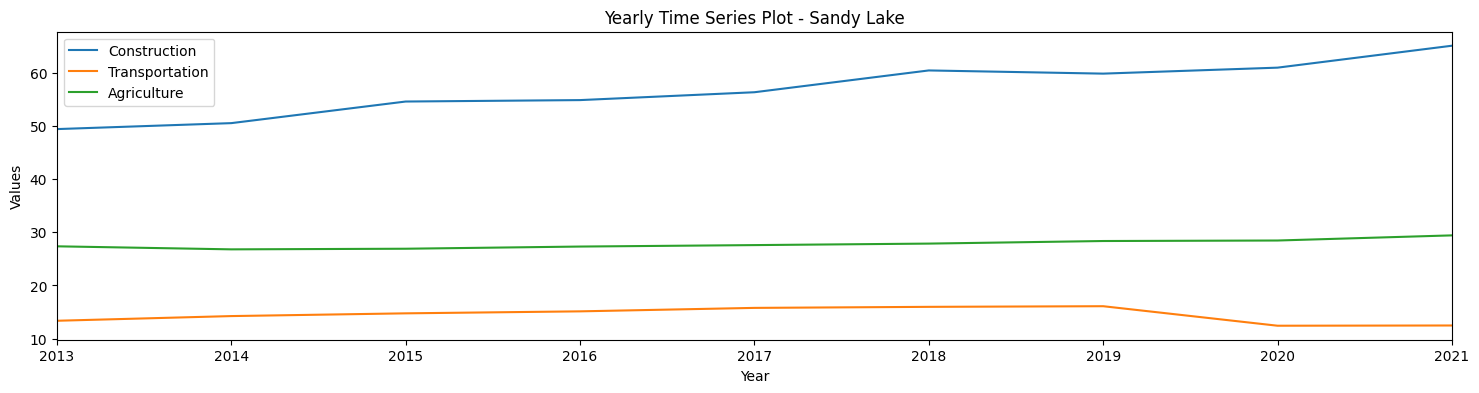

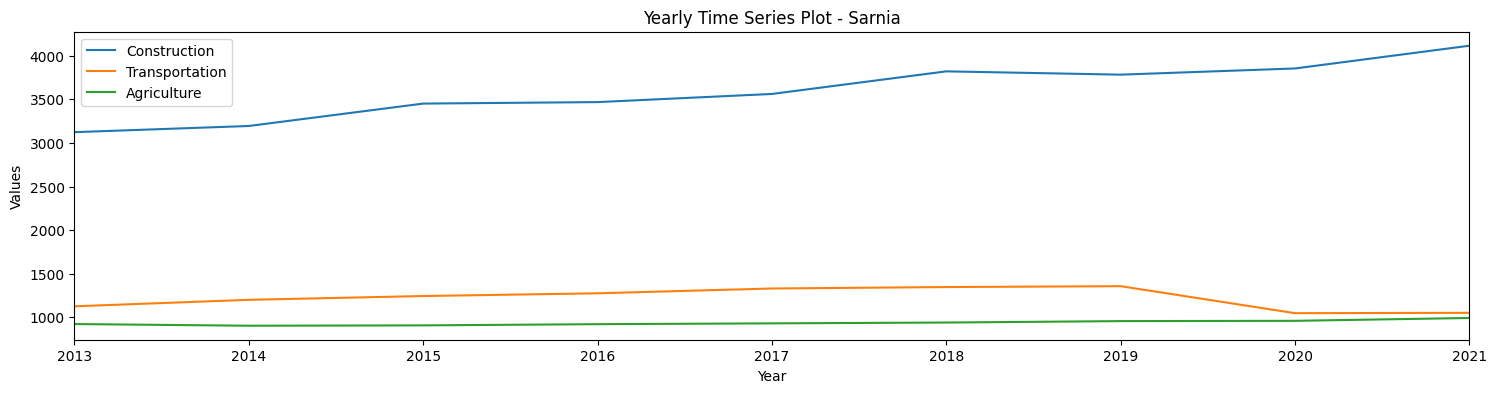

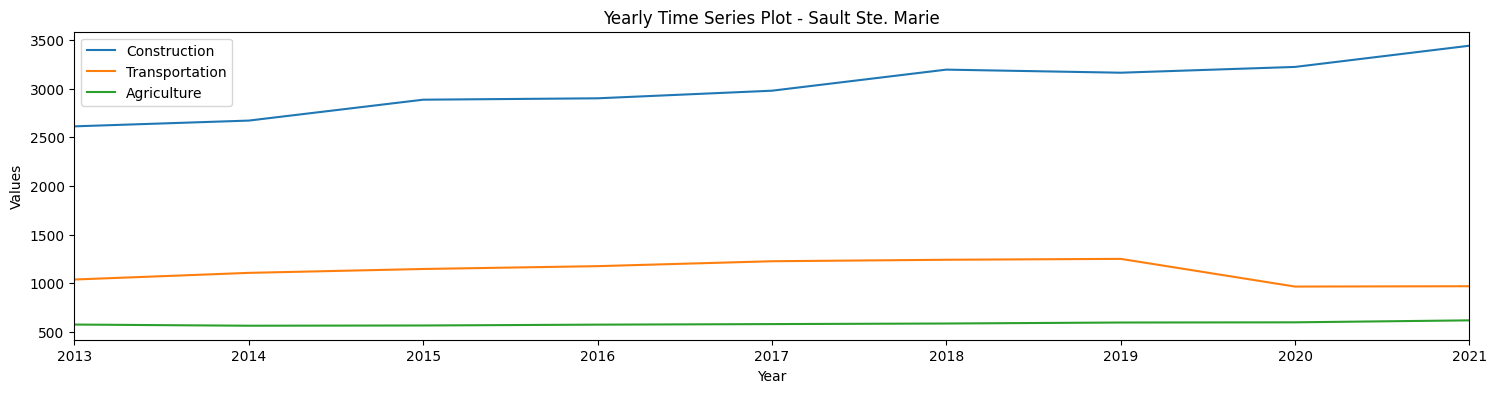

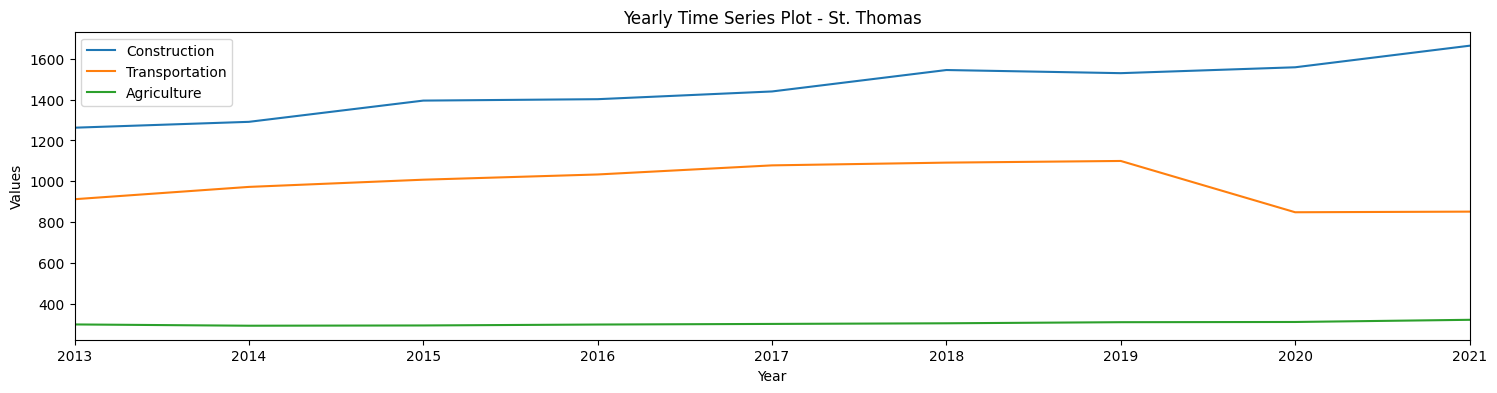

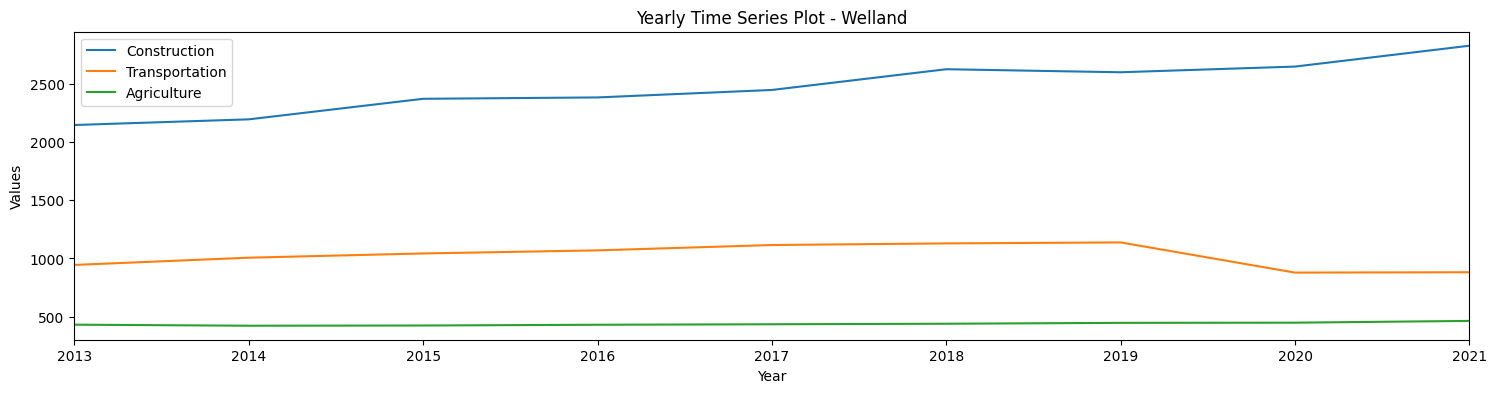

In [9]:
for station_name in unique_station_names:
    station_data = df[df['Station Name'] == station_name]
    yearly_data = station_data[productivity_columns].resample('Y').sum()
    yearly_data.plot(figsize=(18, 4), title=f'Yearly Time Series Plot - {station_name}')
    plt.xlabel('Year')
    plt.ylabel('Values')
    plt.show()

As per the charts, profits from agriculture is maximum in most of the regions, Banff, Jasper, Waterton Park is getting profits from Transportation. Moreover, Cardston Claresholm is getting profits from Healthcare.

# ARIMA 
## Construction Dorion - ON


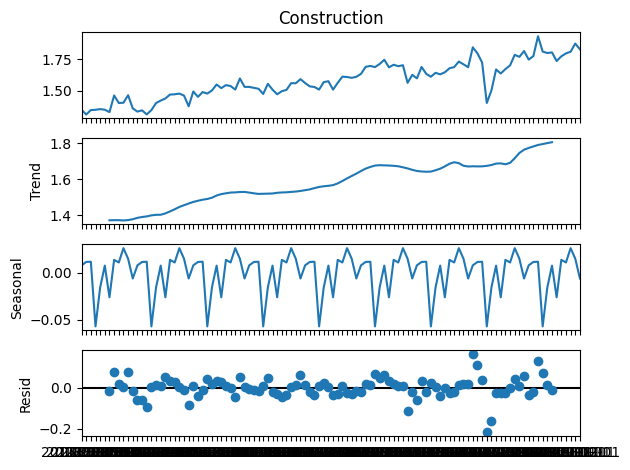

In [14]:
ConstructionDorion = pd.read_csv('FinalON.csv')
Construction_Dorion = ConstructionDorion[ConstructionDorion['Station Name'] == 'Dorion'][['Date', 'Construction']]
Construction_Dorion.set_index('Date', inplace=True)
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Construction_Dorion['Construction'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [15]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary
from statsmodels.tsa.stattools import adfuller
def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
        
adfuller_test(Construction_Dorion['Construction'])    

ADF Test Statistic : -1.456532434323063
p-value : 0.5548941846037165
#Lags Used : 2
Number of Observations Used : 105
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [16]:
Construction_Dorion['Construction-diff'] = Construction_Dorion['Construction'] - Construction_Dorion['Construction'].shift(1)

In [17]:
adfuller_test(Construction_Dorion['Construction-diff'].dropna())

ADF Test Statistic : -7.978236878842135
p-value : 2.66634659245591e-12
#Lags Used : 2
Number of Observations Used : 104
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

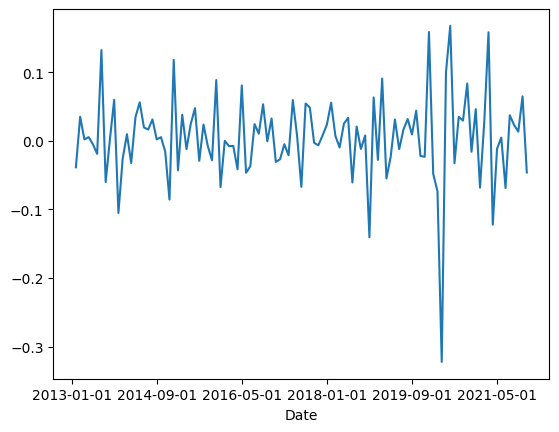

In [18]:
Construction_Dorion['Construction-diff'].plot()

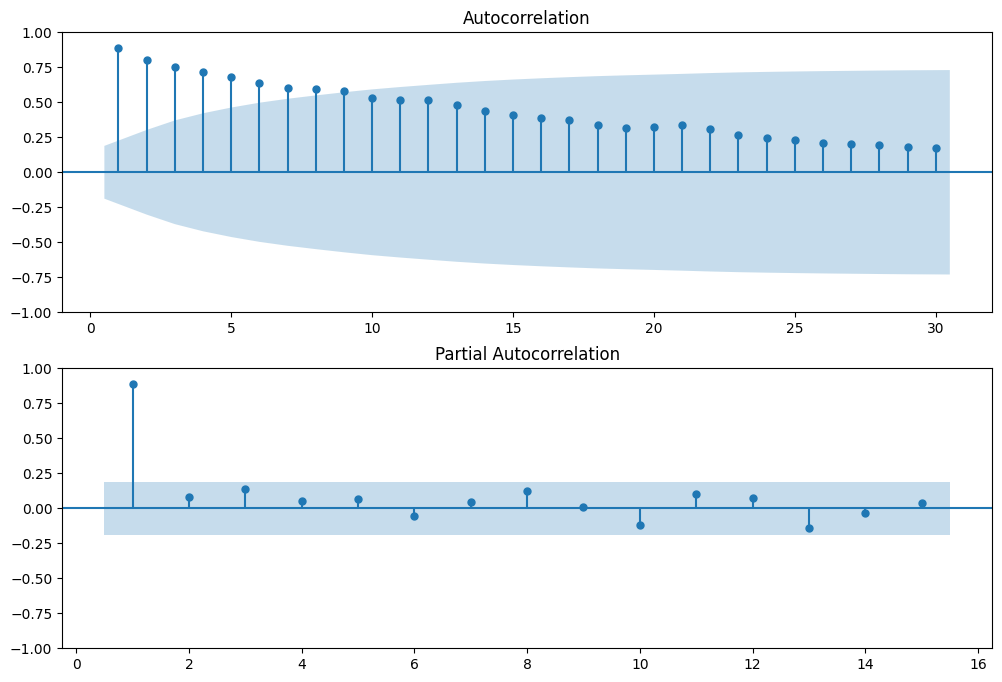

In [19]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Construction_Dorion['Construction'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Construction_Dorion['Construction'],zero= False,lags=15,ax=ax2)


In [20]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Construction_Dorion['Construction'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [21]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
7  1  2 -293.182531 -279.771875
8  1  3 -291.654647 -275.561860
6  1  1 -291.582957 -280.854432
9  1  4 -290.097272 -271.322353
5  1  0 -287.737336 -279.690943
4  0  4 -246.394062 -230.301275
3  0  3 -245.941641 -232.530985
2  0  2 -221.528517 -210.799992
1  0  1 -189.275466 -181.229072
0  0  0 -103.489642  -98.125380
   p  q         AIC         BIC
6  1  1 -291.582957 -280.854432
7  1  2 -293.182531 -279.771875
5  1  0 -287.737336 -279.690943
8  1  3 -291.654647 -275.561860
9  1  4 -290.097272 -271.322353
3  0  3 -245.941641 -232.530985
4  0  4 -246.394062 -230.301275
2  0  2 -221.528517 -210.799992
1  0  1 -189.275466 -181.229072
0  0  0 -103.489642  -98.125380


In [22]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Construction_Dorion['Construction'], order=(1, 1, 4))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:           Construction   No. Observations:                  108
Model:                 ARIMA(1, 1, 4)   Log Likelihood                 152.116
Date:                Wed, 03 Apr 2024   AIC                           -292.233
Time:                        17:02:52   BIC                           -276.196
Sample:                    01-01-2013   HQIC                          -285.731
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6966      0.619     -1.126      0.260      -1.909       0.516
ma.L1          0.3842      0.588      0.654      0.513      -0.768       1.536
ma.L2         -0.4092      0.265     -1.545      0.1

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [23]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Construction_Dorion.index = pd.to_datetime(Construction_Dorion.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Construction_Dorion[Construction_Dorion.index <= train_dataset_end]
test_data = Construction_Dorion[(Construction_Dorion.index > train_dataset_end) & (Construction_Dorion.index <= test_dataset_end)]


In [24]:
test_data

,Construction,Construction-diff
Date,,
2021-07-01,1.735784,-0.068745
2021-08-01,1.773202,0.037419
2021-09-01,1.796519,0.023317
2021-10-01,1.810111,0.013592
2021-11-01,1.875106,0.064995
2021-12-01,1.829027,-0.046079


In [25]:
model = sm.tsa.ARIMA(train_data['Construction'], order=(1, 1, 4))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


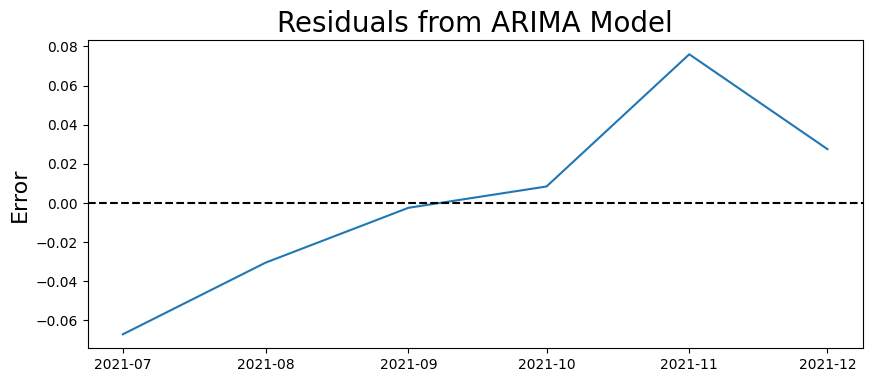

In [26]:
forecast_periods = len(test_data['Construction'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

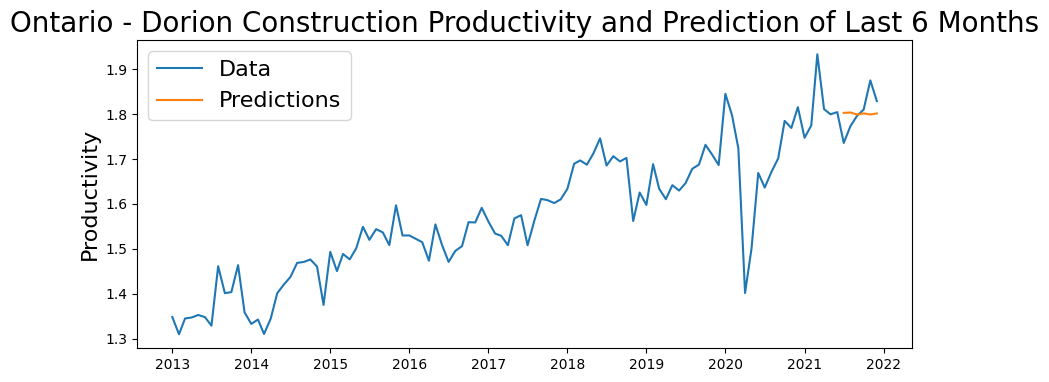

In [27]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Construction_Dorion['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario - Dorion Construction Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [28]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.044767300966617615
Mean Absolute Error: 0.03530801398449098
Mean Squared Error: 0.0020041112358357223


# SARIMA 
## Construction Dorion- Ontario

In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
7  1  2 -293.182531 -279.771875
8  1  3 -291.654647 -275.561860
6  1  1 -291.582957 -280.854432
9  1  4 -290.097272 -271.322353
5  1  0 -287.737336 -279.690943
4  0  4 -246.394062 -230.301275
3  0  3 -245.941641 -232.530985
2  0  2 -221.528517 -210.799992
1  0  1 -189.275466 -181.229072
0  0  0 -103.489642  -98.125380
   p  q         AIC         BIC
6  1  1 -291.582957 -280.854432
7  1  2 -293.182531 -279.771875
5  1  0 -287.737336 -279.690943
8  1  3 -291.654647 -275.561860
9  1  4 -290.097272 -271.322353
3  0  3 -245.941641 -232.530985
4  0  4 -246.394062 -230.301275
2  0  2 -221.528517 -210.799992
1  0  1 -189.275466 -181.229072
0  0  0 -103.489642  -98.125380


In [30]:
model_SARIMA=SARIMAX(Construction_Dorion['Construction'],order=(1,1,2),seasonal_order=(1,0,2,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       Construction   No. Observations:                  108
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                 153.877
Date:                            Wed, 03 Apr 2024   AIC                           -293.754
Time:                                    17:02:58   BIC                           -275.044
Sample:                                01-01-2013   HQIC                          -286.169
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5772      0.261      2.215      0.027       0.067       1.088
ma.L1         -0.9148      0.365     -2.510      0.012      -1.629      -0.200
ma.L2          0.0441      0.252      0.175      0.861      -0.450       0.538
ar.S.L12       0.6620      0.801      0.826      0.409      -0.909       2.233
ma.S.L12      -0.5211      0.824     -0.633      0.527      -2.135       1.093
ma.S.L24       0.0596      0.307      0.194      0.846      -0.543       0.662
sigma2         0.0033      0.000     11.273      0.000       0.003       0.004
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):               511.36
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               3.20   Skew:                            -1.36
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.36
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [31]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Construction_Dorion[:train_dataset_end]
test_data=Construction_Dorion[train_dataset_end+timedelta(days=1):test_dataset_end]


In [32]:
#Fit SARIMA model
my_order = (1,1,2)
my_seasonal_order = (1, 0, 2, 12)
# define model
model = SARIMAX(train_data['Construction'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                       Construction   No. Observations:                  102
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                 144.093
Date:                            Wed, 03 Apr 2024   AIC                           -274.186
Time:                                    17:03:10   BIC                           -255.880
Sample:                                01-01-2013   HQIC                          -266.775
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5281      0.267      1.979      0.048       0.005       1.051
ma.L1         -0.8320      0.348   

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Text(0, 0.5, 'Error')

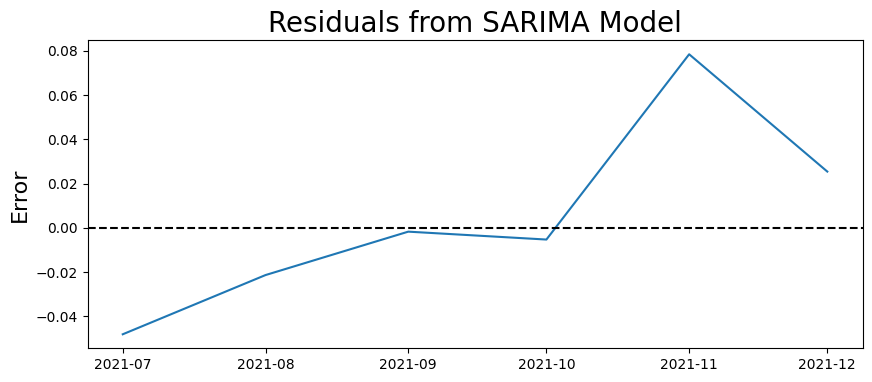

In [33]:
predictions = model_fit.forecast(steps=len(test_data['Construction']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Construction'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

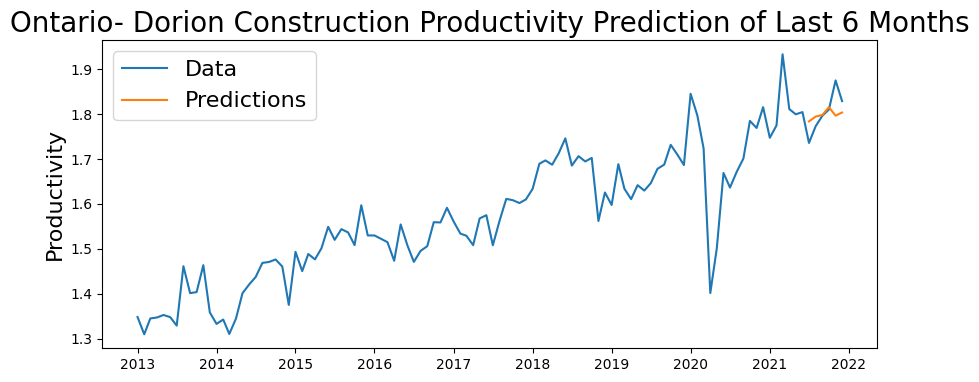

In [34]:
plt.figure(figsize=(10,4))

plt.plot(Construction_Dorion['Construction'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario- Dorion Construction Productivity Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [35]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.03997874405188476
Mean Absolute Error: 0.03003067083438356
Mean Squared Error: 0.001598299975966111


# ARIMA 
## Transportation Dorion - Ontario

In [36]:
TransportationDorion = pd.read_csv('FinalON.csv')

In [37]:
Transportation_Dorion = TransportationDorion[TransportationDorion['Station Name'] == 'Dorion'][['Date', 'Transportation']]

In [38]:
Transportation_Dorion.set_index('Date', inplace=True)


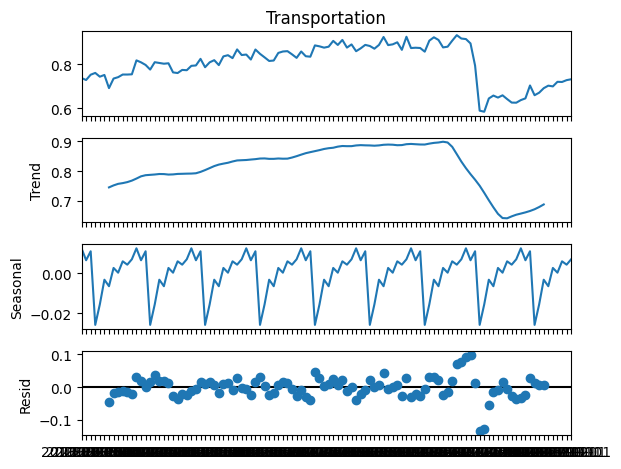

In [39]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Transportation_Dorion['Transportation'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [40]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Transportation_Dorion)
# Print test statistic
print(result)

(-1.9733528679794092, 0.29837774655191995, 0, 107, {'1%': -3.492995948509562, '5%': -2.888954648057252, '10%': -2.58139291903223}, -371.4894192615418)


In [41]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [42]:
Transportation_Dorion['Transportation-d'] = Transportation_Dorion['Transportation'] - Transportation_Dorion['Transportation'].shift(1)

In [43]:
adfuller_test(Transportation_Dorion['Transportation-d'].dropna())

ADF Test Statistic : -9.97050036639104
p-value : 2.24707409002876e-17
#Lags Used : 0
Number of Observations Used : 106
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

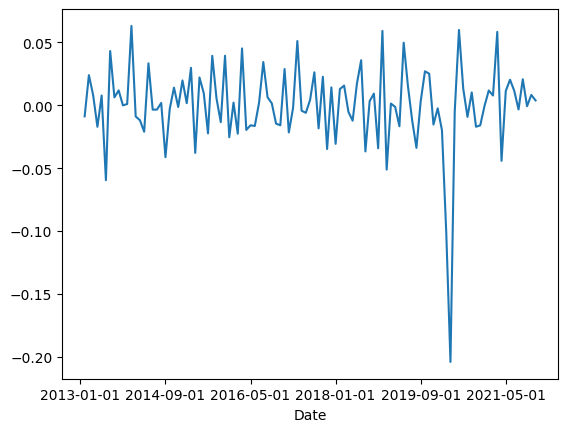

In [44]:
Transportation_Dorion['Transportation-d'].plot()

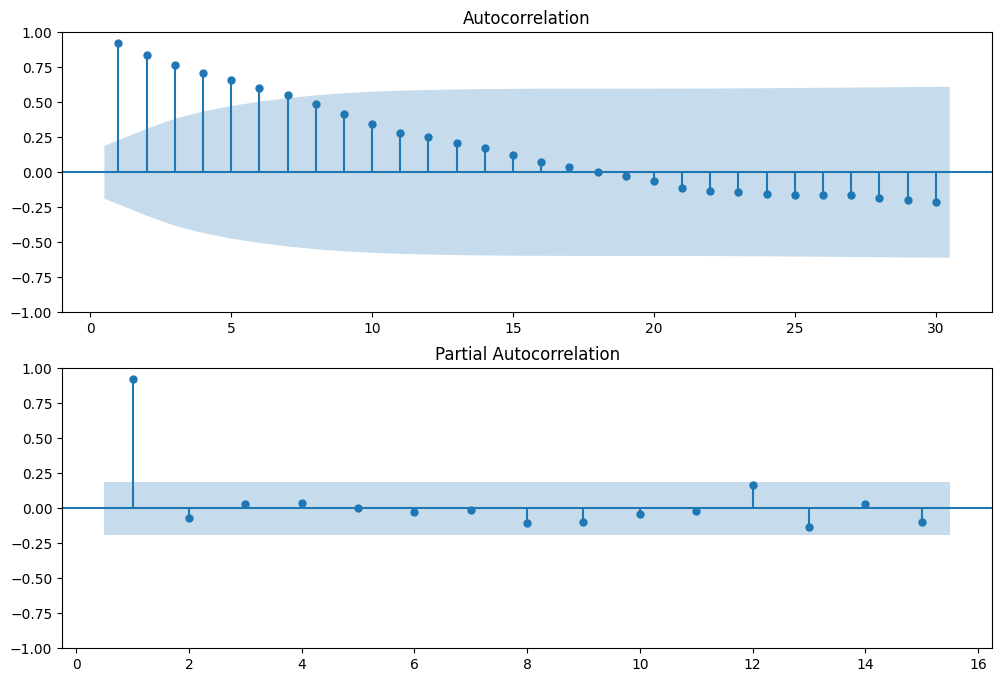

In [45]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Transportation_Dorion['Transportation'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Transportation_Dorion['Transportation'],zero= False,lags=15,ax=ax2)


In [46]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Transportation_Dorion['Transportation'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [47]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  0 -427.866865 -419.820471
6  1  1 -426.294323 -415.565798
7  1  2 -424.367159 -410.956503
8  1  3 -422.535142 -406.442355
9  1  4 -420.619568 -401.844650
4  0  4 -392.188543 -376.095756
3  0  3 -385.406229 -371.995573
2  0  2 -363.178879 -352.450354
1  0  1 -315.615551 -307.569158
0  0  0 -219.089176 -213.724914
   p  q         AIC         BIC
5  1  0 -427.866865 -419.820471
6  1  1 -426.294323 -415.565798
7  1  2 -424.367159 -410.956503
8  1  3 -422.535142 -406.442355
9  1  4 -420.619568 -401.844650
4  0  4 -392.188543 -376.095756
3  0  3 -385.406229 -371.995573
2  0  2 -363.178879 -352.450354
1  0  1 -315.615551 -307.569158
0  0  0 -219.089176 -213.724914


In [48]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Transportation_Dorion['Transportation'], order=(1, 0, 0))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:         Transportation   No. Observations:                  108
Model:                 ARIMA(1, 0, 0)   Log Likelihood                 216.933
Date:                Wed, 03 Apr 2024   AIC                           -427.867
Time:                        17:03:27   BIC                           -419.820
Sample:                    01-01-2013   HQIC                          -424.604
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7905      0.052     15.328      0.000       0.689       0.892
ar.L1          0.9280      0.045     20.650      0.000       0.840       1.016
sigma2         0.0010   6.11e-05     16.937      0.0

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Use testing data as of last six months

In [49]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Transportation_Dorion.index = pd.to_datetime(Transportation_Dorion.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Transportation_Dorion[Transportation_Dorion.index <= train_dataset_end]
test_data = Transportation_Dorion[(Transportation_Dorion.index > train_dataset_end) & (Transportation_Dorion.index <= test_dataset_end)]


In [50]:
test_data

,Transportation,Transportation-d
Date,,
2021-07-01,0.703137,0.011452
2021-08-01,0.699838,-0.003298
2021-09-01,0.720586,0.020748
2021-10-01,0.719887,-0.000699
2021-11-01,0.728163,0.008276
2021-12-01,0.732087,0.003924


In [51]:
model = sm.tsa.ARIMA(train_data['Transportation'], order=(1, 0, 0))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [52]:
forecast_periods = len(test_data['Transportation'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    0.699098
2021-08-01    0.705956
2021-09-01    0.712300
2021-10-01    0.718168
2021-11-01    0.723597
2021-12-01    0.728618
Name: predicted_mean, dtype: float64

In [53]:
residuals = test_data['Transportation'] - predictions
residuals

Date
2021-07-01    0.004039
2021-08-01   -0.006118
2021-09-01    0.008286
2021-10-01    0.001718
2021-11-01    0.004567
2021-12-01    0.003469
dtype: float64

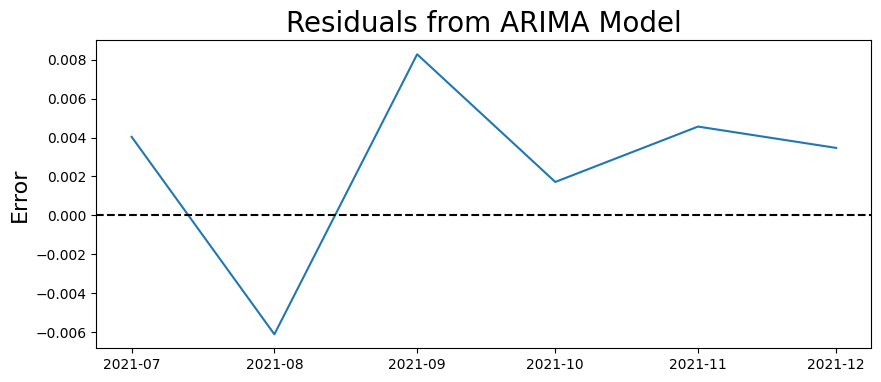

In [54]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

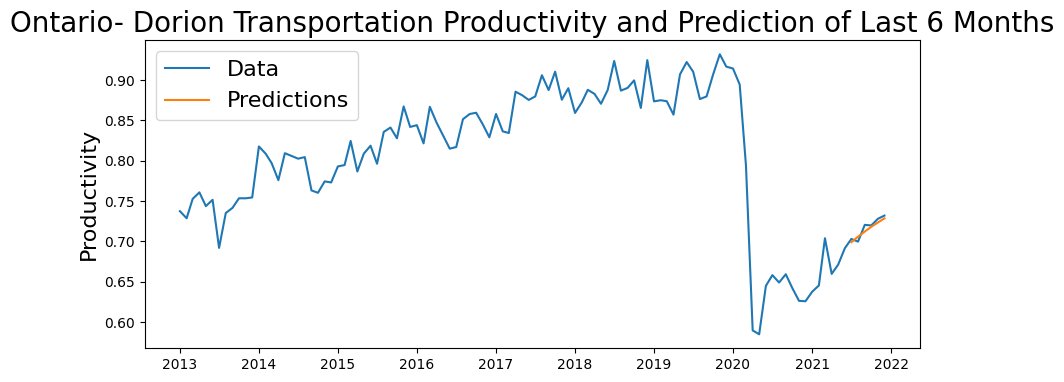

In [55]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Transportation_Dorion['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario- Dorion Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [56]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.005135482626189051
Mean Absolute Error: 0.004699466903951843
Mean Squared Error: 2.6373181803889593e-05


# SARIMA

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  0 -427.866865 -419.820471
6  1  1 -426.294323 -415.565798
7  1  2 -424.367159 -410.956503
8  1  3 -422.535142 -406.442355
9  1  4 -420.619568 -401.844650
4  0  4 -392.188543 -376.095756
3  0  3 -385.406229 -371.995573
2  0  2 -363.178879 -352.450354
1  0  1 -315.615551 -307.569158
0  0  0 -219.089176 -213.724914
   p  q         AIC         BIC
5  1  0 -427.866865 -419.820471
6  1  1 -426.294323 -415.565798
7  1  2 -424.367159 -410.956503
8  1  3 -422.535142 -406.442355
9  1  4 -420.619568 -401.844650
4  0  4 -392.188543 -376.095756
3  0  3 -385.406229 -371.995573
2  0  2 -363.178879 -352.450354
1  0  1 -315.615551 -307.569158
0  0  0 -219.089176 -213.724914


In [58]:
model_SARIMA=SARIMAX(Transportation_Dorion['Transportation'],order=(0,1,0),seasonal_order=(1,0,0,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                     Transportation   No. Observations:                  108
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 214.508
Date:                            Wed, 03 Apr 2024   AIC                           -425.015
Time:                                    17:03:28   BIC                           -419.670
Sample:                                01-01-2013   HQIC                          -422.848
                                     - 12-01-2021                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1282      0.110      1.163      0.245      -0.088       0.344
sigma2         0.0011   5.53e-05     19.153      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):               813.99
Prob(Q):                              0.53   Prob(JB):                         0.00
Heteroskedasticity (H):               3.27   Skew:                            -2.22
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [59]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Transportation_Dorion[:train_dataset_end]
test_data=Transportation_Dorion[train_dataset_end+timedelta(days=1):test_dataset_end]


In [60]:
#Fit SARIMA model
my_order = (0,1,0)
my_seasonal_order = (1, 0, 0, 12)
# define model
model = SARIMAX(train_data['Transportation'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Transportation   No. Observations:                  102
Model:             SARIMAX(0, 1, 0)x(1, 0, 0, 12)   Log Likelihood                 199.829
Date:                            Wed, 03 Apr 2024   AIC                           -395.658
Time:                                    17:03:28   BIC                           -390.428
Sample:                                01-01-2013   HQIC                          -393.541
                                     - 06-01-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1233      0.116      1.065      0.287      -0.104       0.350
sigma2         0.0011   6.16e-05   

Text(0, 0.5, 'Error')

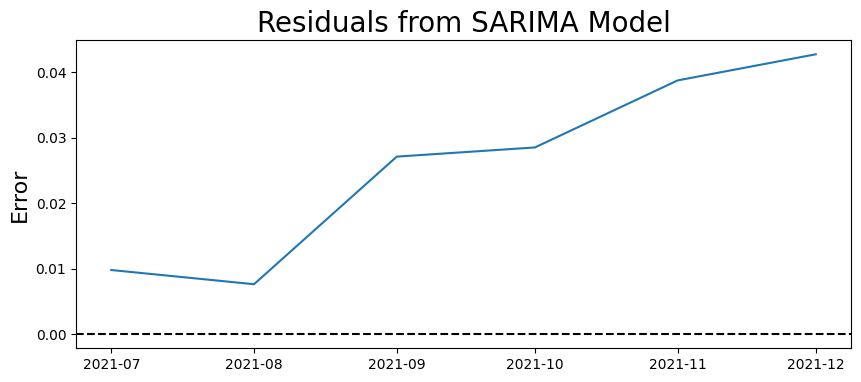

In [61]:
predictions = model_fit.forecast(steps=len(test_data['Transportation']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Transportation'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

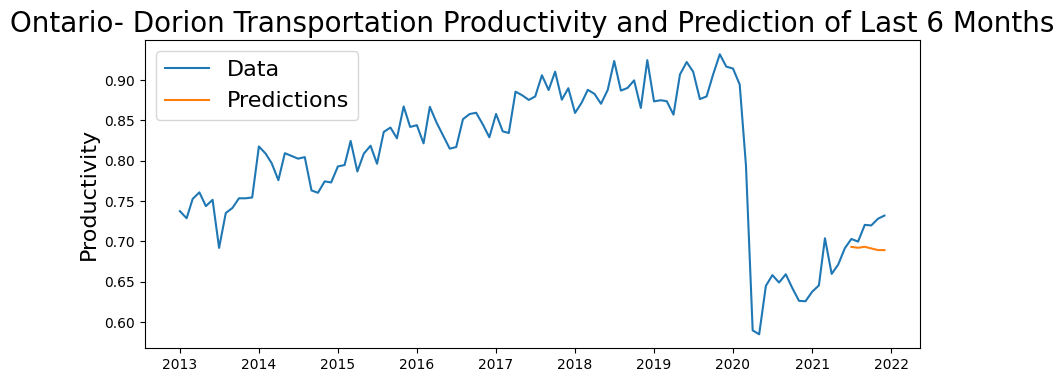

In [62]:
plt.figure(figsize=(10,4))

plt.plot(Transportation_Dorion['Transportation'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario- Dorion Transportation Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [63]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.028967225046588635
Mean Absolute Error: 0.0257703684748042
Mean Squared Error: 0.0008391001268997119


# ARIMA 
## Agriculture Moosone - Ontario

In [67]:
Agriculture = pd.read_csv('FinalON.csv')

In [68]:
Agriculture_Moosone = Agriculture[Agriculture['Station Name'] == 'Moosone'][['Date', 'Agriculture']]

In [69]:
Agriculture_Moosone.set_index('Date', inplace=True)


In [70]:
Agriculture_Moosone

,Agriculture
Date,
2013-01-01,1.041940
2013-02-01,1.112734
2013-03-01,1.040278
2013-04-01,1.125648
2013-05-01,1.182806
...,...
2021-08-01,1.242171
2021-09-01,1.277026
2021-10-01,1.218646


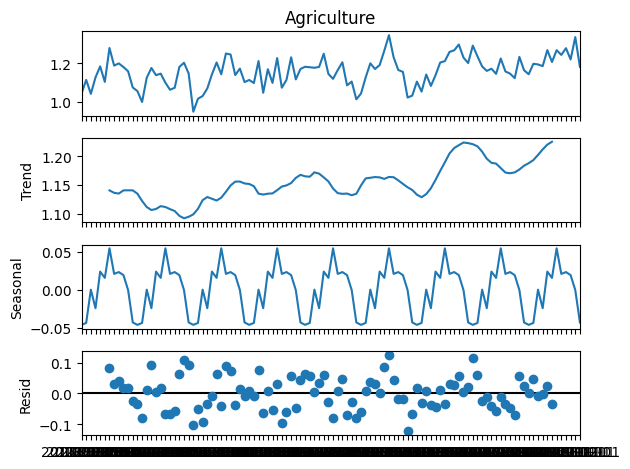

In [71]:
# Import seasonal decompose
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform additive decomposition
decomp = seasonal_decompose(Agriculture_Moosone['Agriculture'],
                            period=12)

# Plot decomposition
decomp.plot()
plt.show()

In [72]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(Agriculture_Moosone)
# Print test statistic
print(result)

(-4.050160438189781, 0.001169472859197329, 1, 106, {'1%': -3.4936021509366793, '5%': -2.8892174239808703, '10%': -2.58153320754717}, -249.21878617473578)


In [73]:
#Ho null hypostheis : It is non stationary
#H1 Alternate hypoyhesis : It is stationary

def adfuller_test(y):
    result=adfuller(y)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")
    

In [74]:
adfuller_test(Agriculture_Moosone['Agriculture'])

ADF Test Statistic : -4.050160438189781
p-value : 0.001169472859197329
#Lags Used : 1
Number of Observations Used : 106
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


<Axes: xlabel='Date'>

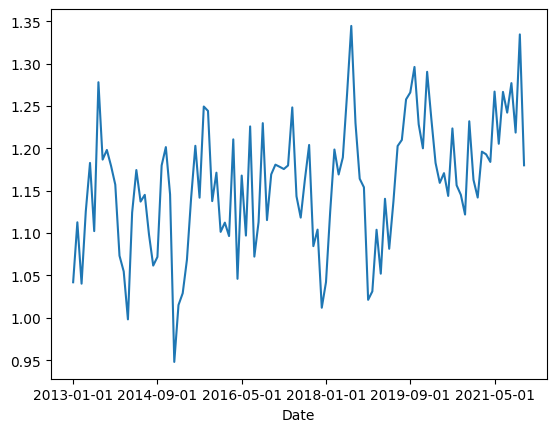

In [75]:
Agriculture_Moosone['Agriculture'].plot()

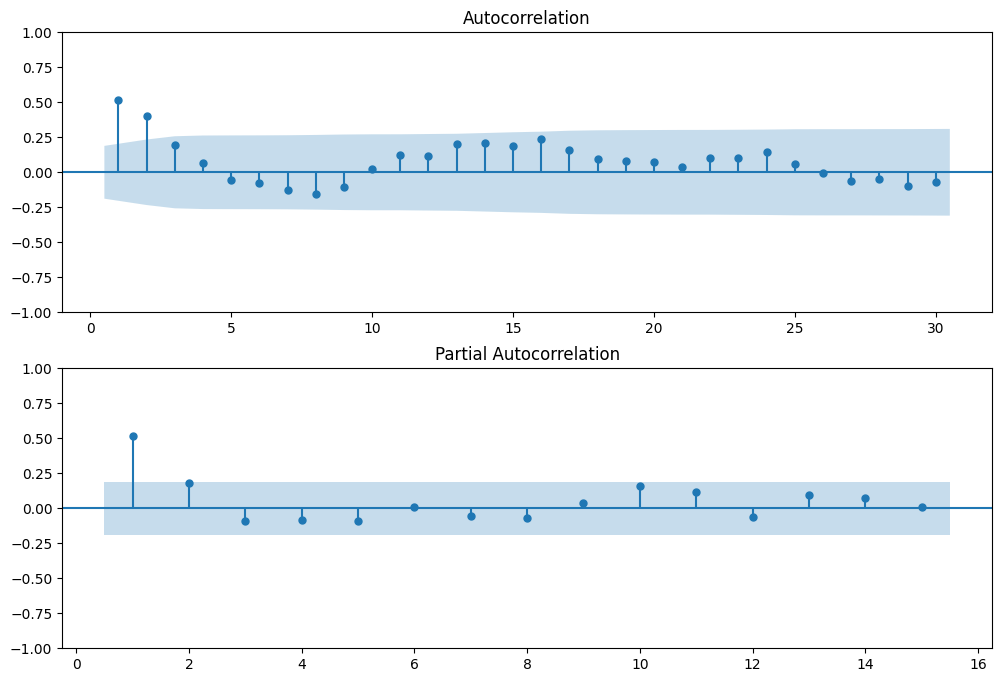

In [76]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = plot_acf(Agriculture_Moosone['Agriculture'],zero=False,lags=30,ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(Agriculture_Moosone['Agriculture'],zero= False,lags=15,ax=ax2)


In [77]:
# Create empty list to store search results
order_aic_bic=[]
# Loop over p values from 0-2
for p in range(2):
# Loop over q values from 0-2
    for q in range(3):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = sm.tsa.ARIMA(Agriculture_Moosone['Agriculture'], order=(p,0,q), trend='c')
            results = model.fit()
            # Append order and results tuple
            order_aic_bic.append((p,q,results.aic, results.bic))
        except:
            print(p, q, None, None)

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473:

In [78]:
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  2 -280.960996 -267.550340
4  1  1 -280.253848 -269.525323
3  1  0 -279.601810 -271.555416
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074
   p  q         AIC         BIC
3  1  0 -279.601810 -271.555416
4  1  1 -280.253848 -269.525323
5  1  2 -280.960996 -267.550340
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074


In [79]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model = sm.tsa.ARIMA(Agriculture_Moosone['Agriculture'], order=(1, 0, 2))
# Fit the model
results_ARIMAX = model.fit()

# Print model fit summary
print(results_ARIMAX.summary())

                               SARIMAX Results                                
Dep. Variable:            Agriculture   No. Observations:                  108
Model:                 ARIMA(1, 0, 2)   Log Likelihood                 145.480
Date:                Wed, 03 Apr 2024   AIC                           -280.961
Time:                        17:03:43   BIC                           -267.550
Sample:                    01-01-2013   HQIC                          -275.523
                         - 12-01-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1568      0.014     80.305      0.000       1.129       1.185
ar.L1          0.5581      0.221      2.526      0.012       0.125       0.991
ma.L1         -0.1356      0.219     -0.621      0.5

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


# Use testing data as of last six months

In [80]:
from datetime import datetime, timedelta
import pandas as pd

# Convert index to DateTimeIndex
Agriculture_Moosone.index = pd.to_datetime(Agriculture_Moosone.index)

train_dataset_end = datetime(2021, 6, 1)
test_dataset_end = datetime(2021, 12, 1)

train_data = Agriculture_Moosone[Agriculture_Moosone.index <= train_dataset_end]
test_data = Agriculture_Moosone[(Agriculture_Moosone.index > train_dataset_end) & (Agriculture_Moosone.index <= test_dataset_end)]


In [81]:
test_data

,Agriculture
Date,
2021-07-01,1.266670
2021-08-01,1.242171
2021-09-01,1.277026
2021-10-01,1.218646
2021-11-01,1.334533
2021-12-01,1.180004


In [82]:
model = sm.tsa.ARIMA(train_data['Agriculture'], order=(1, 0, 1))
results = model.fit()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [83]:
forecast_periods = len(test_data['Agriculture'])  # Number of periods to forecast
predictions = results.forecast(steps=forecast_periods)
predictions = pd.Series(predictions, index=test_data.index)
predictions



Date
2021-07-01    1.186431
2021-08-01    1.173766
2021-09-01    1.165670
2021-10-01    1.160493
2021-11-01    1.157184
2021-12-01    1.155068
Name: predicted_mean, dtype: float64

In [84]:
residuals = test_data['Agriculture'] - predictions
residuals

Date
2021-07-01    0.080239
2021-08-01    0.068405
2021-09-01    0.111356
2021-10-01    0.058153
2021-11-01    0.177350
2021-12-01    0.024936
dtype: float64

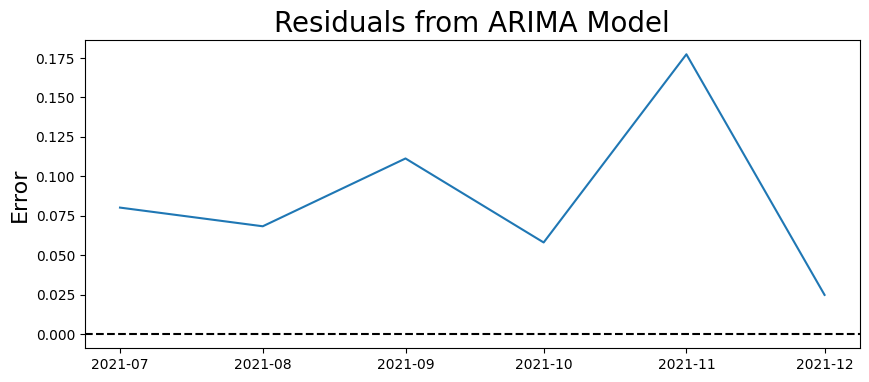

In [85]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.show()

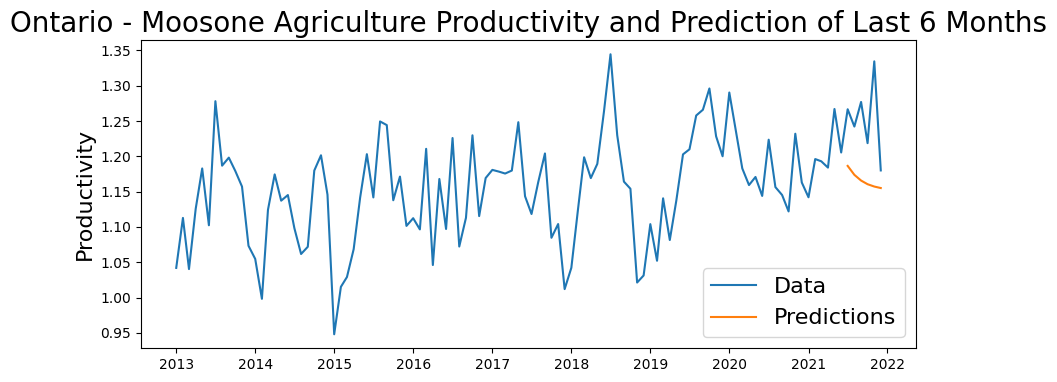

In [86]:
start_date = datetime(2021,6,1)
end_date = datetime(2021,12,1)

plt.figure(figsize=(10,4))

plt.plot(Agriculture_Moosone['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario - Moosone Agriculture Productivity and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [87]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.09914143978490873
Mean Absolute Error: 0.08673972704191295
Mean Squared Error: 0.009829025082624685


# SARIMA

In [88]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Construct DataFrame from order_aic_bic
order_df = pd.DataFrame(order_aic_bic,
                        columns=['p', 'q', 'AIC', 'BIC'])

# Print order_df in order of increasing AIC
print(order_df.sort_values('AIC'))

# Print order_df in order of increasing BIC
print(order_df.sort_values('BIC'))

   p  q         AIC         BIC
5  1  2 -280.960996 -267.550340
4  1  1 -280.253848 -269.525323
3  1  0 -279.601810 -271.555416
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074
   p  q         AIC         BIC
3  1  0 -279.601810 -271.555416
4  1  1 -280.253848 -269.525323
5  1  2 -280.960996 -267.550340
2  0  2 -276.999460 -266.270935
1  0  1 -266.694926 -258.648532
0  0  0 -247.064337 -241.700074


In [89]:
model_SARIMA=SARIMAX(Agriculture_Moosone['Agriculture'],order=(0,0,0),seasonal_order=(1,0,2,12))
model_SARIMA_fit=model_SARIMA.fit()
model_SARIMA_fit.summary()

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:                   Agriculture   No. Observations:                  108
Model:             SARIMAX(1, 0, [1, 2], 12)   Log Likelihood                  45.498
Date:                       Wed, 03 Apr 2024   AIC                            -82.996
Time:                               17:03:45   BIC                            -72.267
Sample:                           01-01-2013   HQIC                           -78.646
                                - 12-01-2021                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9998      0.001    762.485      0.000       0.997       1.002
ma.S.L12       0.1041      0.111      0.942      0.346      -0.113       0.321
ma.S.L24      -0.8958      0.582     -1.539      0.124      -2.037       0.245
sigma2         0.0113      0.007      1.610      0.107      -0.002       0.025
===================================================================================
Ljung-Box (L1) (Q):                   7.83   Jarque-Bera (JB):                 1.16
Prob(Q):                              0.01   Prob(JB):                         0.56
Heteroskedasticity (H):               2.19   Skew:                            -0.13
Prob(H) (two-sided):                  0.02   Kurtosis:                         2.57
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Predictions for last 6 months


In [90]:
from datetime import datetime,timedelta
train_dataset_end=datetime(2021,6,1)
test_dataset_end=datetime(2021,12,1)


train_data=Agriculture_Moosone[:train_dataset_end]
test_data=Agriculture_Moosone[train_dataset_end+timedelta(days=1):test_dataset_end]


In [91]:
#Fit SARIMA model
my_order = (0,0,0)
my_seasonal_order = (1, 0, 2, 12)
# define model
model = SARIMAX(train_data['Agriculture'].dropna(), order=my_order, seasonal_order=my_seasonal_order)
model_fit = model.fit()
print(model_fit.summary())

C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\PC\anaconda3\envs\MachineLearning2\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


                                   SARIMAX Results                                   
Dep. Variable:                   Agriculture   No. Observations:                  102
Model:             SARIMAX(1, 0, [1, 2], 12)   Log Likelihood                  79.956
Date:                       Wed, 03 Apr 2024   AIC                           -151.911
Time:                               17:03:46   BIC                           -141.411
Sample:                           01-01-2013   HQIC                          -147.659
                                - 06-01-2021                                         
Covariance Type:                         opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9998      0.001   1340.526      0.000       0.998       1.001
ma.S.L12      -0.8845      0.130     -6.809      0.000      -1.139      -0.

Text(0, 0.5, 'Error')

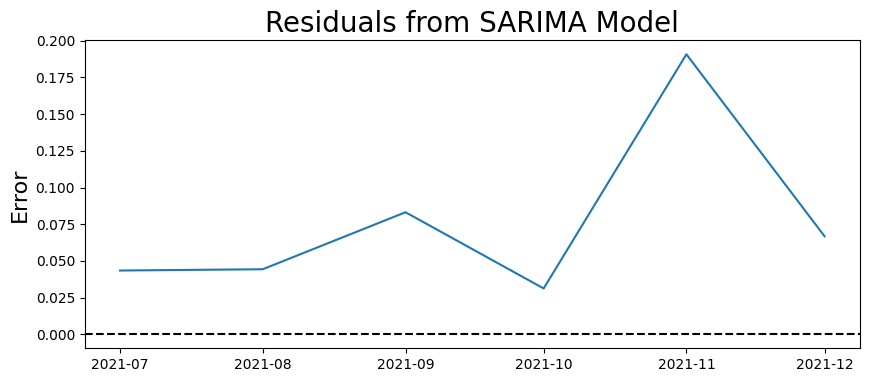

In [92]:
predictions = model_fit.forecast(steps=len(test_data['Agriculture']))
predictions = pd.Series(predictions, index=test_data.index)
predictions
residuals = test_data['Agriculture'] - predictions
residuals
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Productivity')

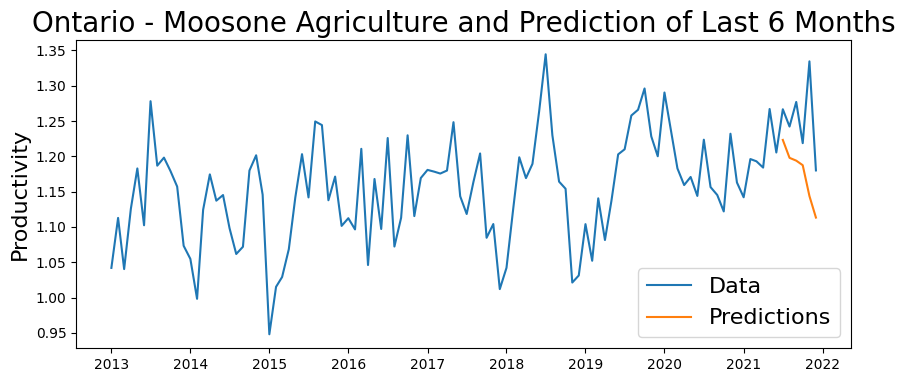

In [93]:
plt.figure(figsize=(10,4))

plt.plot(Agriculture_Moosone['Agriculture'])
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Ontario - Moosone Agriculture and Prediction of Last 6 Months', fontsize=20)
plt.ylabel('Productivity', fontsize=16)


In [94]:
rmse = np.sqrt(np.mean(residuals**2))
print('Root Mean Squared Error:', rmse)

# Calculate Mean Absolute Error (MAE)
mae = np.mean(np.abs(residuals))
print('Mean Absolute Error:', mae)

# Calculate Mean Squared Error (MSE)
mse = np.mean(residuals**2)
print('Mean Squared Error:', mse)

Root Mean Squared Error: 0.09363315808496274
Mean Absolute Error: 0.07661994908740684
Mean Squared Error: 0.008767168292963623
